In [2]:
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt
from QuditsOnQubits import create_ame43, create_graph_ghz, create_ghz
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_ibm_runtime import QiskitRuntimeService

In [4]:
service = QiskitRuntimeService(channel="ibm_quantum", token="69c33c504eae6077ab5a35bc23ed37d0e2ce46a8d88b9c3f72fd32883335a986ef5c86d80f8b561cbdbe773a8d56475d710fd741d28597d1148e2dcf74fe488d")
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
backend.name

'ibm_strasbourg'

In [9]:
with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('CZ.qpy', 'rb') as fd:
    CZgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

In [6]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import igraph as ig

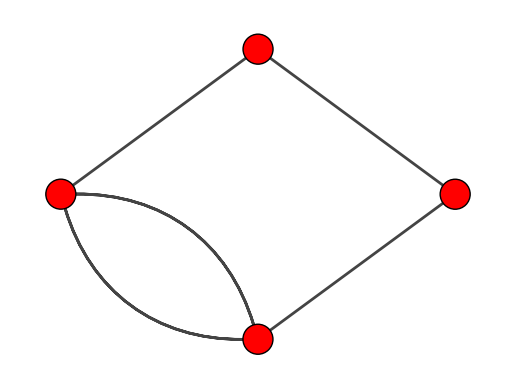

In [7]:
sq = ig.Graph()
sq.add_vertices(4)
sq.add_edges([(0, 1), (1, 2), (2, 3), (2, 3), (3, 0)])

fig, ax = plt.subplots()
ig.plot(sq, target=ax)

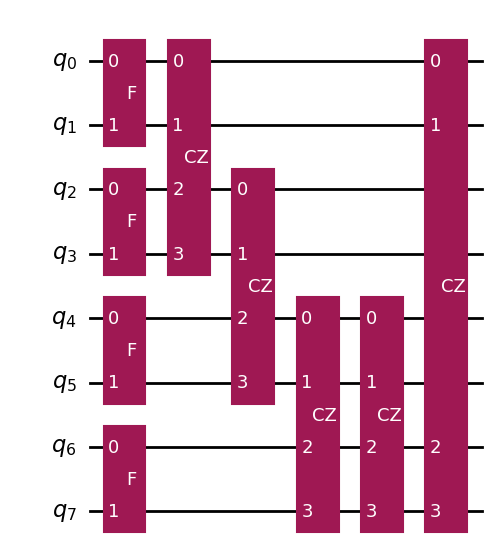

In [8]:
ame43_qc = create_graph_ghz(sq)
ame43_qc.draw('mpl')

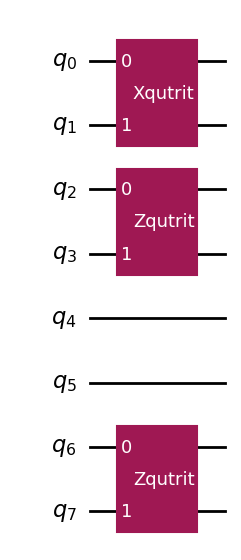

In [10]:
stab_ame43_1 = QuantumCircuit(8)
stab_ame43_1.append(Xgate, [0, 1])
stab_ame43_1.append(Zgate, [2, 3])
stab_ame43_1.append(Zgate, [6, 7])

op_ame43_1 = SparsePauliOp.from_operator(Operator(stab_ame43_1))

stab_ame43_1.draw('mpl')

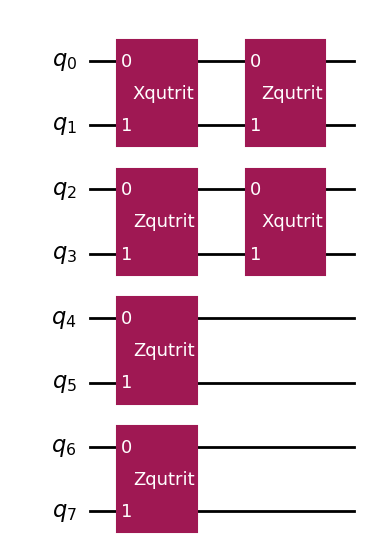

In [11]:
stab_ame43_2 = QuantumCircuit(8)
stab_ame43_2.append(Xgate, [0, 1])
stab_ame43_2.append(Zgate, [0, 1])
stab_ame43_2.append(Zgate, [2, 3])
stab_ame43_2.append(Xgate, [2, 3])
stab_ame43_2.append(Zgate, [4, 5])
stab_ame43_2.append(Zgate, [6, 7])

op_ame43_2 = SparsePauliOp.from_operator(Operator(stab_ame43_2))

stab_ame43_2.draw('mpl')

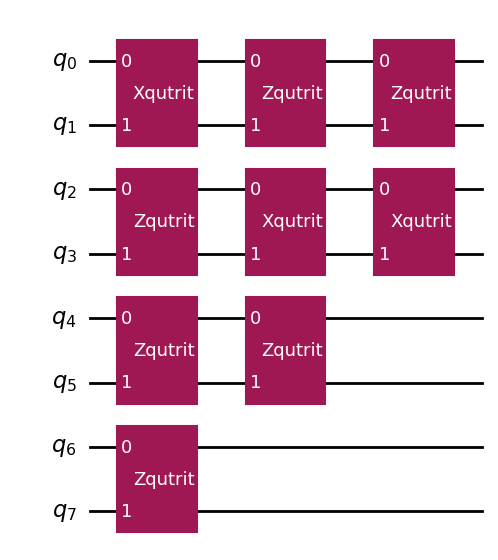

In [12]:
stab_ame43_3 = QuantumCircuit(8)
stab_ame43_3.append(Xgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [0, 1])
stab_ame43_3.append(Zgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Xgate, [2, 3])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [4, 5])
stab_ame43_3.append(Zgate, [6, 7])

op_ame43_3 = SparsePauliOp.from_operator(Operator(stab_ame43_3))

stab_ame43_3.draw('mpl')

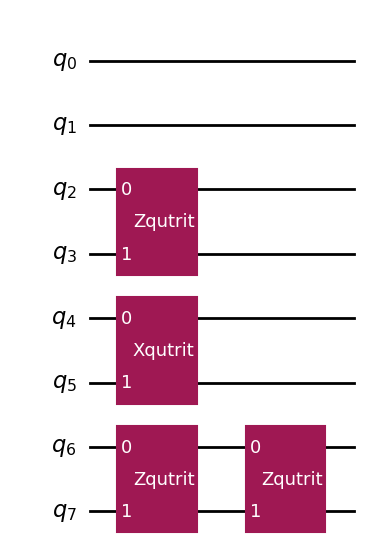

In [13]:
stab_ame43_4 = QuantumCircuit(8)
stab_ame43_4.append(Zgate, [2, 3])
stab_ame43_4.append(Xgate, [4, 5])
stab_ame43_4.append(Zgate, [6, 7])
stab_ame43_4.append(Zgate, [6, 7])

op_ame43_4 = SparsePauliOp.from_operator(Operator(stab_ame43_4))

stab_ame43_4.draw('mpl')

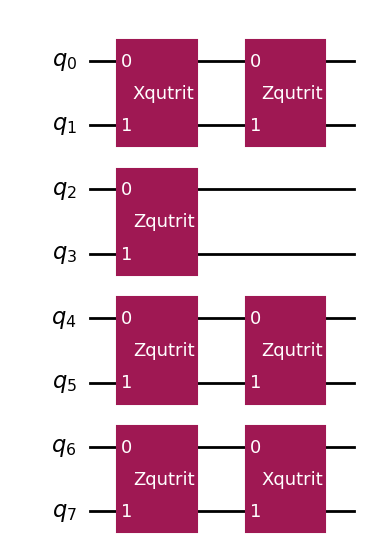

In [14]:
stab_ame43_5 = QuantumCircuit(8)
stab_ame43_5.append(Xgate, [0, 1])
stab_ame43_5.append(Zgate, [0, 1])
stab_ame43_5.append(Zgate, [2, 3])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [4, 5])
stab_ame43_5.append(Zgate, [6, 7])
stab_ame43_5.append(Xgate, [6, 7])

op_ame43_5 = SparsePauliOp.from_operator(Operator(stab_ame43_5))

stab_ame43_5.draw('mpl')

In [16]:
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

ame43_isa_circuit = pm.run(ame43_qc)

In [48]:
ame43_isa_circuit.draw('mpl', idleWires=False)

TypeError: QuantumCircuit.draw() got an unexpected keyword argument 'idleWires'

In [55]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import Batch

In [19]:
estimator = Estimator(mode=backend)

In [20]:
pub = (ame43_isa_circuit, op_ame43_1)

In [31]:
isa_observable = op_ame43_1.apply_layout(layout=ame43_isa_circuit.layout)

In [33]:
isa_observable

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIXIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIYIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [42]:
A = (0.5 * (op_ame43_1 + op_ame43_1.adjoint()))
B = (-0.5j * (op_ame43_1 - op_ame43_1.adjoint()))

In [43]:
A.equiv(A.conjugate().transpose())

True

In [44]:
B.equiv(B.conjugate().transpose())

True

In [46]:
isa_observable_A = A.apply_layout(layout=ame43_isa_circuit.layout)
isa_observable_B = B.apply_layout(layout=ame43_isa_circuit.layout)

In [47]:
job_result = estimator.run([(ame43_isa_circuit, isa_observable_A)]).result()

C:\Users\szymon\.conda\envs\qudityPAN\lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


In [54]:
job_result[0].data.evs

array(-0.03683445)

In [59]:
op_list = [op_ame43_1, op_ame43_2,op_ame43_3, op_ame43_4, op_ame43_5]
A_list = []
B_list = []

for i in op_list:
    a = 0.5 * (i + i.adjoint())
    b = -0.5j * (i - i.adjoint())

    isa_a = a.apply_layout(layout=ame43_isa_circuit.layout)
    isa_b = b.apply_layout(layout=ame43_isa_circuit.layout)

    A_list.append(isa_a)
    B_list.append(isa_b)

In [60]:
evs_list_A = []

with Batch(backend=backend):
    estimator = Estimator(mode=backend)
    for A in A_list:
        job_result = estimator.run([(ame43_isa_circuit, A)]).result()
        result = job_result[0].data.evs
        evs_list_A.append(result)

base_primitive._get_mode_service_backend:WARNING:2025-06-27 14:50:00,229: A backend was passed in as the mode but a session context manager is open so this job will run inside this session/batch instead of in job mode.


RequestsApiError: 'HTTPSConnectionPool(host=\'api.quantum.ibm.com\', port=443): Max retries exceeded with url: /runtime/jobs/d1f9vjpn2txg008epyf0?exclude_params=true (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002268CA1BE20>: Failed to resolve \'api.quantum.ibm.com\' ([Errno 11002] getaddrinfo failed)"))'